In [62]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
import pandas

from sklearn import metrics
from sklearn import manifold
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering as hac


### El dataset "beer.csv" es el dataset original pero que se le sacaron los datos innecesarios 
### para que acorde al objetivo de la actividad
df = pandas.read_csv('beer.csv', delimiter=',', index_col=[0,1])
df= df.sample(n=10000) #se toma una muestra para evitar problemas de memoria
X = df.values.tolist()
y = list(df.index.values)


brew=[x[0] for x in y] #lista de cervecerias como indice
beer=[x[1] for x in y] #lista de tipo de cervezas como indice
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) #reduccion dimensional
            
            

En primer lugar se estimara la cantidad de clusters que hay utilizando el coeficiente Silhouette.

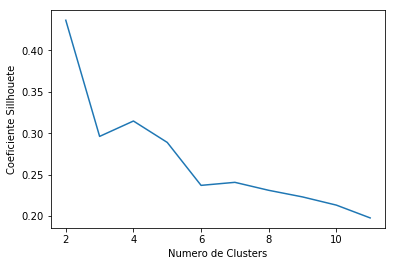

In [22]:
a=10 #numero de iteraciones
sil=[0]*a #lista de f
for i in range(2,a+2):
	clustering = KMeans(init='k-means++', n_clusters=i,n_init=10)
	clustering.fit(X)
	sil[i-2]=metrics.silhouette_score(X, clustering.labels_, metric='euclidean')

plt.plot(range(2,a+2), sil)
plt.ylabel('Coeficiente Sillhouete')
plt.xlabel('Numero de Clusters')
plt.show()


In [ ]:
Se observa que con K=2 Silhouette se maximiza, por lo tanto se ocupara como la cantidad de clusters.

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


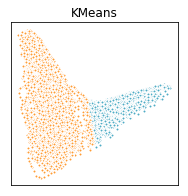

                     Cerveceria   Cerveza
Rand Score Ajustado   -0.000017  0.000006
Mutual Info            0.041215  0.133613
Homogeneidad           0.013879  0.038622
Completitud            0.122390  0.462235
V Measure              0.024931  0.071287
Fowlkes Mallows       11.273092       NaN


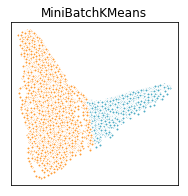

                     Cerveceria   Cerveza
Rand Score Ajustado   -0.000022  0.000007
Mutual Info            0.041252  0.134144
Homogeneidad           0.013903  0.038806
Completitud            0.122403  0.463705
V Measure              0.024970  0.071619
Fowlkes Mallows             NaN       NaN


In [35]:

### Preparacion del dataset acorde a la informacion que se usara de este
df = pd.read_csv('beer.csv', delimiter=',', index_col=[0,1])
##Por problemas de memoria se utiliza el 10 por ciento aprox de los datos
df= df[:10000]
X = df.values.tolist()
y = list(df.index.values)

#Reduccion de dimensionilidaad a 2 componentes con Embedding Espectral
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

###################################################################
#Una vez reducida la dimensionalidad, se aplica el algoritmo K-Means para 2 clusters.
##################################################################
from sklearn.cluster import KMeans

##Se ejecuta K-means para generar 2 clusters
clustering = KMeans(init='k-means++', n_clusters=2, n_init=10)
clustering.fit(X_red)
k_means_labels = clustering.labels_
k_means_cluster_centers = clustering.cluster_centers_

fig = plt.figure(figsize=(3,3))
colors = ['#4EACC5','#FF9C34','#4E9A06']
ax = fig.add_subplot(1,1,1)
ax.set_title('KMeans')

for k, col in zip(range(2), colors):
	my_members = k_means_labels == k
	ax.plot(X_red[my_members, 0], X_red[my_members, 1], 'w', markerfacecolor=col, marker='.')
	

    
header=['Cerveceria','Cerveza']
indice=["Rand Score Ajustado","Mutual Info","Homogeneidad","Completitud","V Measure","Fowlkes Mallows",]
coef=[[metrics.adjusted_rand_score(brew, clustering.labels_),metrics.adjusted_rand_score(beer, clustering.labels_)],
[metrics.normalized_mutual_info_score(brew, clustering.labels_),metrics.normalized_mutual_info_score(beer, clustering.labels_)],
[metrics.homogeneity_score(brew, clustering.labels_),metrics.homogeneity_score(beer, clustering.labels_)],
[metrics.completeness_score(brew, clustering.labels_),metrics.completeness_score(beer, clustering.labels_)],
[metrics.v_measure_score(brew, clustering.labels_),metrics.v_measure_score(beer, clustering.labels_)],
[metrics.fowlkes_mallows_score(brew, clustering.labels_),metrics.fowlkes_mallows_score(beer, clustering.labels_)]]

coeficientes=pandas.DataFrame(coef,indice,header)    
    
    
ax.set_xticks(())
ax.set_yticks(())
plt.show()
print(coeficientes)

#################################################################
#El proceso para MiniBatchKMeans es analogo, solo que en este caso se especifia el numero consecutivo de mini batches
#sin mejora para la convergencia.
############################################################################
from sklearn.cluster import MiniBatchKMeans

clustering = MiniBatchKMeans(init='k-means++', n_clusters=2, max_no_improvement=15, n_init=10)
clustering.fit(X_red)
k_means2_labels = clustering.labels_
k_means2_cluster_centers = clustering.cluster_centers_

fig2 = plt.figure(figsize=(3,3))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title('MiniBatchKMeans')


for k, col in zip(range(2), colors):
	my_members = k_means2_labels == k
	ax2.plot(X_red[my_members, 0], X_red[my_members, 1], 'w', markerfacecolor=col, marker='.')
	

header=['Cerveceria','Cerveza']
indice=["Rand Score Ajustado","Mutual Info","Homogeneidad","Completitud","V Measure","Fowlkes Mallows",]
coef=[[metrics.adjusted_rand_score(brew, clustering.labels_),metrics.adjusted_rand_score(beer, clustering.labels_)],
[metrics.normalized_mutual_info_score(brew, clustering.labels_),metrics.normalized_mutual_info_score(beer, clustering.labels_)],
[metrics.homogeneity_score(brew, clustering.labels_),metrics.homogeneity_score(beer, clustering.labels_)],
[metrics.completeness_score(brew, clustering.labels_),metrics.completeness_score(beer, clustering.labels_)],
[metrics.v_measure_score(brew, clustering.labels_),metrics.v_measure_score(beer, clustering.labels_)],
[metrics.fowlkes_mallows_score(brew, clustering.labels_),metrics.fowlkes_mallows_score(beer, clustering.labels_)]]

coeficientes=pandas.DataFrame(coef,indice,header)    
       
    
    
ax2.set_xticks(())
ax2.set_yticks(())
plt.show()
print(coeficientes)


Se estimara la cantidad de clusters que hay utilizando el coeficiente Silhouette.

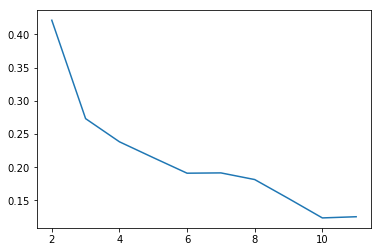

In [7]:
a=10 #numero de iteraciones
sil=[0]*a #lista de f
for i in range(2,a+2):
	clustering = hac(linkage="ward", n_clusters=i, affinity="euclidean")
	clustering.fit(X)
	sil[i-2]=metrics.silhouette_score(X, clustering.labels_, metric='euclidean')

plt.plot(range(2,a+2), sil)
plt.ylabel('Coeficiente Sillhouete')
plt.xlabel('Numero de Clusters')
plt.show()

Se observa que con K=2 Silhouette se maximiza, por lo tanto se ocupara como la cantidad de clusters.

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


                     Cerveceria   Cerveza
Rand Score Ajustado   -0.000005  0.000006
Mutual Info            0.041517  0.132859
Homogeneidad           0.013935  0.038279
Completitud            0.123690  0.461129
V Measure              0.025049  0.070689
Fowlkes Mallows             NaN       NaN


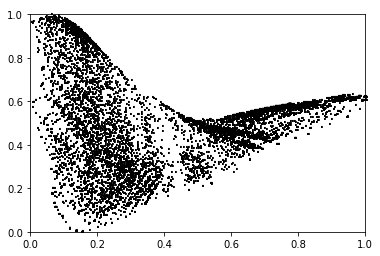

NameError: name 'ff' is not defined

In [33]:

clustering = hac(linkage="complete", n_clusters=2, affinity="euclidean")
clustering.fit(X)
header=['Cerveceria','Cerveza']
indice=["Rand Score Ajustado","Mutual Info","Homogeneidad","Completitud","V Measure","Fowlkes Mallows",]
coef=[[metrics.adjusted_rand_score(brew, clustering.labels_),metrics.adjusted_rand_score(beer, clustering.labels_)],
[metrics.normalized_mutual_info_score(brew, clustering.labels_),metrics.normalized_mutual_info_score(beer, clustering.labels_)],
[metrics.homogeneity_score(brew, clustering.labels_),metrics.homogeneity_score(beer, clustering.labels_)],
[metrics.completeness_score(brew, clustering.labels_),metrics.completeness_score(beer, clustering.labels_)],
[metrics.v_measure_score(brew, clustering.labels_),metrics.v_measure_score(beer, clustering.labels_)],
[metrics.fowlkes_mallows_score(brew, clustering.labels_),metrics.fowlkes_mallows_score(beer, clustering.labels_)]]

coeficientes=pandas.DataFrame(coef,indice,header)




x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)

for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], '.',
	color=plt.cm.spectral(clustering.labels_[i]+1000),
	fontdict={'weight': 'bold', 'size': 10})
plt.set_title('hac complete')
plt.show()
print(coeficientes)


In [ ]:

clustering = hac(linkage="ward", n_clusters=2, affinity="euclidean")
clustering.fit(X)
header=['Cerveceria','Cerveza']
indice=["Rand Score Ajustado","Mutual Info","Homogeneidad","Completitud","V Measure","Fowlkes Mallows",]
coef=[[metrics.adjusted_rand_score(brew, clustering.labels_),metrics.adjusted_rand_score(beer, clustering.labels_)],
[metrics.normalized_mutual_info_score(brew, clustering.labels_),metrics.normalized_mutual_info_score(beer, clustering.labels_)],
[metrics.homogeneity_score(brew, clustering.labels_),metrics.homogeneity_score(beer, clustering.labels_)],
[metrics.completeness_score(brew, clustering.labels_),metrics.completeness_score(beer, clustering.labels_)],
[metrics.v_measure_score(brew, clustering.labels_),metrics.v_measure_score(beer, clustering.labels_)],
[metrics.fowlkes_mallows_score(brew, clustering.labels_),metrics.fowlkes_mallows_score(beer, clustering.labels_)]]

coeficientes=pandas.DataFrame(coef,indice,header)




x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)

for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], '.',
	color=plt.cm.spectral(clustering.labels_[i]/1000),
	fontdict={'weight': 'bold', 'size': 10})

plt.set_title('hac ward')
plt.show()
print(coeficientes)


In [64]:
####################################################################
#Dado que el eps es un parámetro sensible, se debe probar con valores
#entre 0.09 y 0.1 para obtener los clusters necesarios.
#################################################################
db = DBSCAN(eps=0.093, min_samples=10).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
	##Se dejan los NOISE POINTS en negro
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)
	
	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    

clustering = hac(linkage="ward", n_clusters=2, affinity="euclidean")
clustering.fit(X)
header=['Cerveceria','Cerveza']
indice=["Rand Score Ajustado","Mutual Info","Homogeneidad","Completitud","V Measure","Fowlkes Mallows",]
coef=[[metrics.adjusted_rand_score(brew, clustering.labels_),metrics.adjusted_rand_score(beer, clustering.labels_)],
[metrics.normalized_mutual_info_score(brew, clustering.labels_),metrics.normalized_mutual_info_score(beer, clustering.labels_)],
[metrics.homogeneity_score(brew, clustering.labels_),metrics.homogeneity_score(beer, clustering.labels_)],
[metrics.completeness_score(brew, clustering.labels_),metrics.completeness_score(beer, clustering.labels_)],
[metrics.v_measure_score(brew, clustering.labels_),metrics.v_measure_score(beer, clustering.labels_)],
[metrics.fowlkes_mallows_score(brew, clustering.labels_),metrics.fowlkes_mallows_score(beer, clustering.labels_)]]

coeficientes=pandas.DataFrame(coef,indice,header)

    
plt.title("DBSCAN")
plt.show()
print(coeficientes)

TypeError: only integer arrays with one element can be converted to an index